Reading Datas

In [84]:
import pandas as pd

main_data = pd.read_csv(r"C:\Users\Taha\Desktop\Folder\QBTC-Divar-Project\Datas\final_pre_last.csv")

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [86]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [87]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466586 entries, 0 to 466585
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cat3_slug             466586 non-null  object 
 1   city_slug             466586 non-null  object 
 2   neighborhood_slug     466586 non-null  object 
 3   land_size             466586 non-null  float64
 4   building_size         466586 non-null  float64
 5   deed_type             466586 non-null  object 
 6   has_business_deed     466586 non-null  bool   
 7   floor                 322089 non-null  object 
 8   rooms_count           438026 non-null  object 
 9   construction_year     438029 non-null  float64
 10  is_rebuilt            466586 non-null  bool   
 11  location_latitude     466586 non-null  float64
 12  location_longitude    466586 non-null  float64
 13  big_city              466586 non-null  int64  
 14  luxury                466586 non-null  int64  
 15  

Delete Empty Rows


In [88]:
df = main_data.copy()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466586 entries, 0 to 466585
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cat3_slug             466586 non-null  object 
 1   city_slug             466586 non-null  object 
 2   neighborhood_slug     466586 non-null  object 
 3   land_size             466586 non-null  float64
 4   building_size         466586 non-null  float64
 5   deed_type             466586 non-null  object 
 6   has_business_deed     466586 non-null  bool   
 7   floor                 322089 non-null  object 
 8   rooms_count           438026 non-null  object 
 9   construction_year     438029 non-null  float64
 10  is_rebuilt            466586 non-null  bool   
 11  location_latitude     466586 non-null  float64
 12  location_longitude    466586 non-null  float64
 13  big_city              466586 non-null  int64  
 14  luxury                466586 non-null  int64  
 15  

Droping Null and filtering

In [90]:
df = df.dropna(subset=['adjusted_price_value', 'location_latitude', 'location_longitude'])
print(f"Remaining rows after filtering: {df.shape[0]}")


Remaining rows after filtering: 466586


In [91]:
df.rename(columns={'lat': 'lat_city', 'long': 'long_city'}, inplace=True)

In [92]:
df.columns

Index(['cat3_slug', 'city_slug', 'neighborhood_slug', 'land_size',
       'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'construction_year', 'is_rebuilt', 'location_latitude',
       'location_longitude', 'big_city', 'luxury', 'basic', 'extra_features',
       'lat_city', 'long_city', 'easting', 'northing', 'zone_number',
       'zone_letter', 'adjusted_price_value'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466586 entries, 0 to 466585
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cat3_slug             466586 non-null  object 
 1   city_slug             466586 non-null  object 
 2   neighborhood_slug     466586 non-null  object 
 3   land_size             466586 non-null  float64
 4   building_size         466586 non-null  float64
 5   deed_type             466586 non-null  object 
 6   has_business_deed     466586 non-null  bool   
 7   floor                 322089 non-null  object 
 8   rooms_count           438026 non-null  object 
 9   construction_year     438029 non-null  float64
 10  is_rebuilt            466586 non-null  bool   
 11  location_latitude     466586 non-null  float64
 12  location_longitude    466586 non-null  float64
 13  big_city              466586 non-null  int64  
 14  luxury                466586 non-null  int64  
 15  

In [94]:
#df = df.dropna(subset=['construction_year'])

In [95]:
#df['construction_year'] = df['construction_year'].astype(int)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466586 entries, 0 to 466585
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cat3_slug             466586 non-null  object 
 1   city_slug             466586 non-null  object 
 2   neighborhood_slug     466586 non-null  object 
 3   land_size             466586 non-null  float64
 4   building_size         466586 non-null  float64
 5   deed_type             466586 non-null  object 
 6   has_business_deed     466586 non-null  bool   
 7   floor                 322089 non-null  object 
 8   rooms_count           438026 non-null  object 
 9   construction_year     438029 non-null  float64
 10  is_rebuilt            466586 non-null  bool   
 11  location_latitude     466586 non-null  float64
 12  location_longitude    466586 non-null  float64
 13  big_city              466586 non-null  int64  
 14  luxury                466586 non-null  int64  
 15  

Use the value count of the Category instead of Numerize them

In [97]:
freq_encoding = df['cat3_slug'].value_counts()
df['cat3_slug_freq'] = df['cat3_slug'].map(freq_encoding)

cat3_counts = df['cat3_slug'].value_counts()

df_counts = cat3_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,apartment-sell,186546
1,apartment-rent,123786
2,house-villa-sell,50284
3,house-villa-rent,33320
4,plot-old,28502
5,shop-rent,21713
6,office-rent,9485
7,shop-sell,8325
8,office-sell,2274
9,industry-agriculture-business-rent,1699


In [98]:
freq_encoding = df['neighborhood_slug'].value_counts()
df['neighborhood_slug_n'] = df['neighborhood_slug'].map(freq_encoding)

neighborhood_counts = df['neighborhood_slug'].value_counts()

df_counts = neighborhood_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,unknown,21086
1,andisheh-new-town,14539
2,pardis-city,8372
3,parand-city,7269
4,eslamshahr,5987
...,...,...
1575,nikmaram,1
1576,safari,1
1577,shaliur,1
1578,jokandan,1


In [99]:
freq_encoding = df['city_slug'].value_counts()
df['city_slug_n'] = df['city_slug'].map(freq_encoding)

city_counts = df['city_slug'].value_counts()

df_counts = city_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts


,category,count
0,tehran,94594
1,karaj,29735
2,mashhad,29482
3,isfahan,18080
4,andisheh-new-town,14539
...,...,...
412,dozin,2
413,anbaralum,1
414,maraveh-tapeh,1
415,zahak,1


Delete non-usable columns

In [100]:
df = df.drop(['city_slug','neighborhood_slug','rooms_count','floor','deed_type','cat3_slug','has_business_deed', 'construction_year'],axis=1)

In [101]:
df = df.drop(['long_city','lat_city', 'big_city'],axis=1)

In [102]:
df.columns

Index(['land_size', 'building_size', 'is_rebuilt', 'location_latitude',
       'location_longitude', 'luxury', 'basic', 'extra_features', 'easting',
       'northing', 'zone_number', 'zone_letter', 'adjusted_price_value',
       'cat3_slug_freq', 'neighborhood_slug_n', 'city_slug_n'],
      dtype='object')

In [103]:
df = df.drop(['is_rebuilt'],axis=1)

In [104]:
df = df.drop(['zone_letter'],axis=1)
df = df.drop(['zone_number','northing','easting'],axis=1)

Scaling

In [105]:
df_scal = df.copy()

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466586 entries, 0 to 466585
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   land_size             466586 non-null  float64
 1   building_size         466586 non-null  float64
 2   location_latitude     466586 non-null  float64
 3   location_longitude    466586 non-null  float64
 4   luxury                466586 non-null  int64  
 5   basic                 466586 non-null  int64  
 6   extra_features        466586 non-null  int64  
 7   adjusted_price_value  466586 non-null  float64
 8   cat3_slug_freq        466586 non-null  int64  
 9   neighborhood_slug_n   466586 non-null  int64  
 10  city_slug_n           466586 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 39.2 MB


Standardinzing Datas

In [107]:

scaler = StandardScaler()

try:
    X_scaled = scaler.fit_transform(df)
except ValueError as e:
    print("Error during scaling:", e)
    raise


Elbow Plot for finding best k

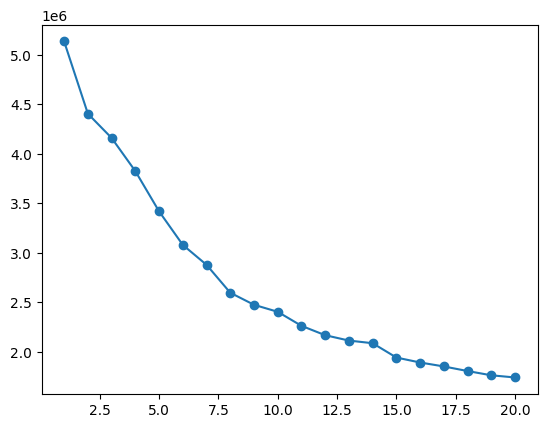

In [108]:
points = []
for k in range(1,21):
    kmeans = KMeans(k, random_state=23)
    kmeans.fit(X_scaled)
    points.append(kmeans.inertia_)
plt.plot(range(1, 21), points, marker='o')
plt.show()

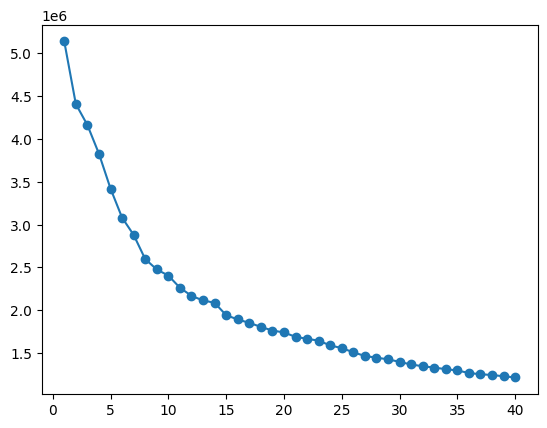

In [109]:
points = []
for k in range(1,41):
    kmeans = KMeans(k, random_state=23)
    kmeans.fit(X_scaled)
    points.append(kmeans.inertia_)
plt.plot(range(1,41), points, marker='o')
plt.show()

Silhiuette Score(Another way to find best K)

Calculating Silhouette
k=2, Silhouette Score=0.1583
k=3, Silhouette Score=0.1504
k=4, Silhouette Score=0.1723
k=5, Silhouette Score=0.1868
k=6, Silhouette Score=0.1854
k=7, Silhouette Score=0.2059
k=8, Silhouette Score=0.2150
k=9, Silhouette Score=0.2079
k=10, Silhouette Score=0.2020
k=11, Silhouette Score=0.1994
k=12, Silhouette Score=0.1997
k=13, Silhouette Score=0.1988
k=14, Silhouette Score=0.2045
k=15, Silhouette Score=0.2027
k=16, Silhouette Score=0.1910
k=17, Silhouette Score=0.1941
k=18, Silhouette Score=0.1924
k=19, Silhouette Score=0.2037
k=20, Silhouette Score=0.1968
k=21, Silhouette Score=0.1971
k=22, Silhouette Score=0.2032
k=23, Silhouette Score=0.2021
k=24, Silhouette Score=0.2036


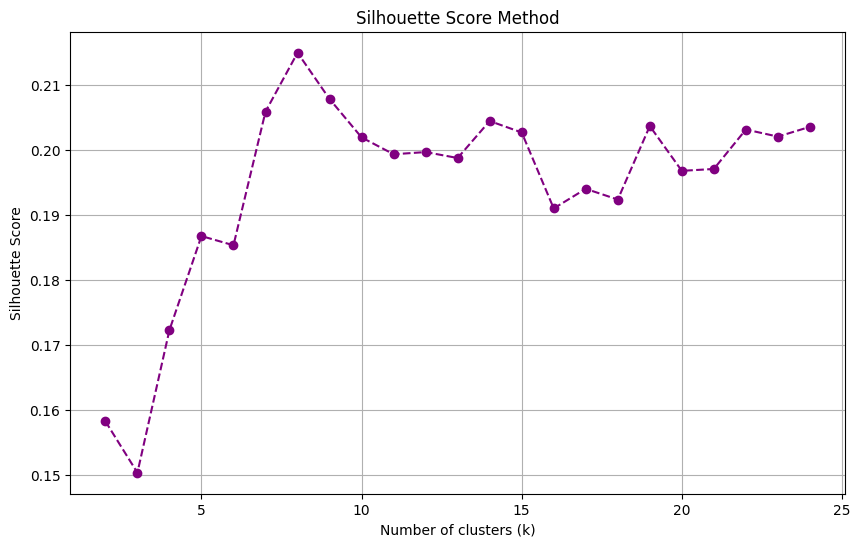

Best k based on Silhouette: 8


In [ ]:

sample_size = 15000 
if X_scaled.shape[0] > sample_size:
    indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
    X_sample = X_scaled[indices]
else:
    X_sample = X_scaled

sil_scores = []
k_range = range(2, 25) 

print("Calculating Silhouette")
for k in k_range:
    km = KMeans(n_clusters=k, random_state=23, n_init=10)
    labels = km.fit_predict(X_sample)
    
    score = silhouette_score(X_sample, labels)
    sil_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, marker='o', color='purple', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

best_k_sil = k_range[np.argmax(sil_scores)]
print(f"Best k based on Silhouette: {best_k_sil}")

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466586 entries, 0 to 466585
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   land_size             466586 non-null  float64
 1   building_size         466586 non-null  float64
 2   location_latitude     466586 non-null  float64
 3   location_longitude    466586 non-null  float64
 4   luxury                466586 non-null  int64  
 5   basic                 466586 non-null  int64  
 6   extra_features        466586 non-null  int64  
 7   adjusted_price_value  466586 non-null  float64
 8   cat3_slug_freq        466586 non-null  int64  
 9   neighborhood_slug_n   466586 non-null  int64  
 10  city_slug_n           466586 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 39.2 MB


Modeling and Training

In [117]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=23)
df['cluster'] = kmeans.fit_predict(X_scaled)

Ploting

In [118]:
df.columns

Index(['land_size', 'building_size', 'location_latitude', 'location_longitude',
       'luxury', 'basic', 'extra_features', 'adjusted_price_value',
       'cat3_slug_freq', 'neighborhood_slug_n', 'city_slug_n', 'cluster'],
      dtype='object')

In [119]:
centroids_latlon = df.groupby('cluster')[["location_latitude", "location_longitude"]].mean().reset_index()

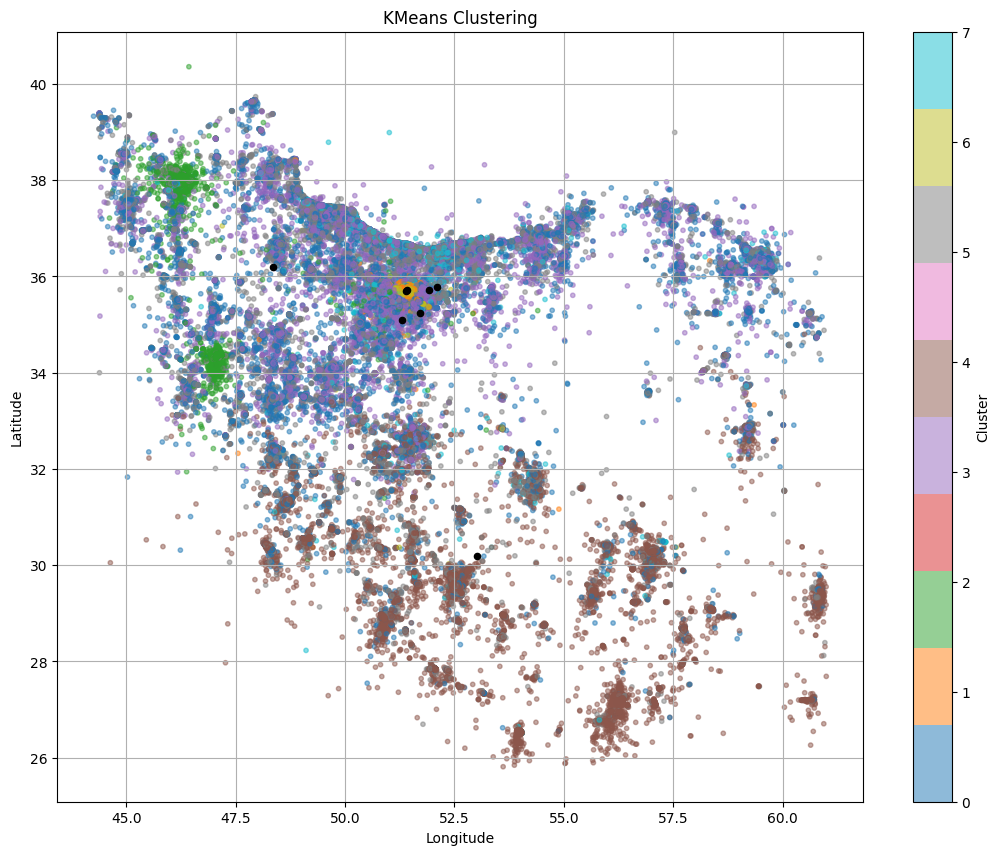

In [120]:
df_scall=df[df['cluster'].notna()]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)
plt.scatter(centroids_latlon['location_longitude'], centroids_latlon['location_latitude'],
            c='black', s=20, marker='o', label='Centers')
plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering")
plt.grid(True)
plt.show()

The description of each number of clusters

In [121]:
df.groupby('cluster').describe()

land_size                                                            \
            count        mean        std        min         25%         50%   
cluster                                                                       
0         86160.0  100.312461  45.078350  25.000000   66.666667  100.000000   
1         34526.0  120.583357  46.216655  25.000000   90.000000  116.666667   
2         34060.0  140.620816  66.406598  25.000000   91.666667  125.000000   
3        139675.0  165.860254  48.153561  25.000000  133.333333  158.333333   
4         50577.0  180.791928  58.326595  25.000000  141.666667  175.000000   
5         45407.0  285.439499  65.087781  28.000000  240.000000  291.666667   
6         55688.0  124.429285  41.059919  25.000000   93.333333  116.666667   
7         20493.0  204.555783  75.082689  36.666667  145.000000  191.666667   

                           building_size                                      \
                75%    max         count        mean        std   min    25%   
cluster                                                                        
0        130.000000  380.0       86160.0   66.677960  28.487256  10.0   50.0   
1        150.000000  400.0       34526.0   73.065052  27.902657  10.0   55.0   
2        180.000000  485.0       34060.0   88.356841  40.982095  12.0   57.0   
3        195.000000  420.0      139675.0  100.791666  29.194133  10.0   80.0   
4        216.666667  480.0       50577.0  115.350159  35.659936  10.0   90.0   
5        333.333333  489.0       45407.0  171.271698  36.540908  10.0  148.0   
6        150.000000  400.0       55688.0   75.232007  24.899788  10.0   57.0   
7        250.000000  489.0       20493.0  114.954277  39.684519  10.0   85.0   

                             location_latitude                       \
           50%    75%    max             count       mean       std   
cluster                                                               
0         70.0   85.0  220.0           86160.0  35.235852  1.961121   
1         70.0   90.0  220.0           34526.0  35.713669  0.120692   
2         78.0  112.0  232.0           34060.0  36.186432  1.489977   
3         95.0  120.0  230.0          139675.0  35.777374  1.193430   
4        110.0  140.0  232.0           50577.0  30.185422  1.692749   
5        178.0  200.0  232.0           45407.0  35.091580  2.350086   
6         70.0   90.0  230.0           55688.0  35.703824  0.079338   
7        105.0  140.0  232.0           20493.0  35.715909  1.582559   

                                                                \
               min        25%        50%        75%        max   
cluster                                                          
0        26.508659  34.611734  35.710009  36.373783  39.661636   
1        30.372875  35.678192  35.720266  35.747103  38.415691   
2        28.686445  34.455506  35.685341  38.046070  40.358055   
3        31.265598  35.510433  35.808598  36.356972  39.657719   
4        25.813490  29.529778  29.811623  31.353315  35.274086   
5        26.679981  33.616941  35.818176  36.650143  39.736210   
6        29.592031  35.675529  35.704124  35.739469  38.264702   
7        26.174696  35.707546  35.837505  36.557621  39.656120   

        location_longitude                                             \
                     count       mean       std        min        25%   
cluster                                                                 
0                  86160.0  51.708552  3.622681  44.253368  49.619334   
1                  34526.0  51.418943  0.565624  45.104290  51.329007   
2                  34060.0  48.346028  2.170586  44.618568  46.335896   
3                 139675.0  52.092441  3.534701  44.373028  50.683825   
4                  50577.0  53.006148  3.123066  44.637451  51.545967   
5                  45407.0  51.308125  3.327840  44.376419  49.320719   
6                  55688.0  51.391982  0.147057  45.229462  51.335930   
7                 